In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [12]:
my_data = pd.concat([x_df, y_df], axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,4.380548
1,0.00001,2.567689
2,0.00002,3.498408
3,0.00003,6.331767
4,0.00004,4.393758


<AxesSubplot:xlabel='X Data', ylabel='Y'>

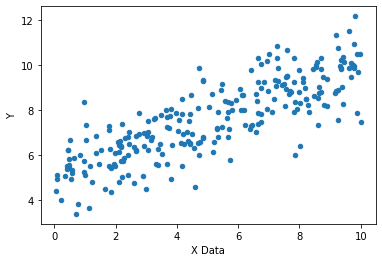

In [18]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [20]:
batch_size = 8

In [21]:
np.random.randn(2)

array([ 0.23636564, -0.53689623])

In [22]:
m = tf.Variable(0.23)
b = tf.Variable(-0.53)

In [23]:
xph = tf.placeholder(tf.float32, [batch_size])

In [24]:
yph = tf.placeholder(tf.float32, [batch_size])

In [25]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [27]:
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [28]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m, b])

In [31]:
model_m

0.5154509

In [32]:
model_b

4.867541

In [33]:
y_hat = x_data* model_m + model_b

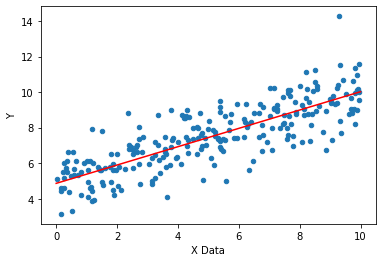

In [37]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'red')

In [38]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [39]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8f317c2780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [45]:
print(x_train.shape)

(700000,)


In [47]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [48]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [49]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [54]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl/model.ckpt.
INFO:tensorflow:loss = 7.5395145, step = 2001
INFO:tensorflow:global_step/sec: 1242.62
INFO:tensorflow:loss = 12.358789, step = 2101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1677.63
INFO:tensorflow:loss = 7.218045, step = 2201 (0.060 sec)
INFO:tensorflow:global_step/sec: 1708.55
INFO:tensorflow:loss = 4.183163, step = 2301 (0.059 sec)
INFO:tensorflow:global_step/sec: 1550.58
INFO:tensorflow:loss = 6.9747906, step = 2401 (0.063 sec)
INFO:tensorflow:global_step/sec: 1576.55
INFO:tensorflow:loss = 10.204958, step = 

In [55]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-14T16:30:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2021-01-14-16:30:07
INFO:tensorflow:Saving dict for global step 3000: average_loss = 1.0112847, global_step = 3000, label/mean = 7.517186, loss = 8.090278, prediction/mean = 7.577785
INFO:tensorflow:Saving 'c

In [56]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-14T16:30:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2021-01-14-16:30:23
INFO:tensorflow:Saving dict for global step 3000: average_loss = 1.0004729, global_step = 3000, label/mean = 7.494033, loss = 8.003783, prediction/mean = 7.559216
INFO:tensorflow:Saving 'c

In [57]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0112847, 'label/mean': 7.517186, 'loss': 8.090278, 'prediction/mean': 7.577785, 'global_step': 3000}


In [58]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0004729, 'label/mean': 7.494033, 'loss': 8.003783, 'prediction/mean': 7.559216, 'global_step': 3000}


In [59]:
brand_new_data = np.linspace(0,10, 10)

In [60]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)

In [61]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([5.006956], dtype=float32)},
 {'predictions': array([5.5779953], dtype=float32)},
 {'predictions': array([6.149034], dtype=float32)},
 {'predictions': array([6.7200727], dtype=float32)},
 {'predictions': array([7.291112], dtype=float32)},
 {'predictions': array([7.862151], dtype=float32)},
 {'predictions': array([8.433189], dtype=float32)},
 {'predictions': array([9.004229], dtype=float32)},
 {'predictions': array([9.575268], dtype=float32)},
 {'predictions': array([10.146307], dtype=float32)}]

In [66]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n4/q75mx7ds7n1fj_tf3zc411240000gn/T/tmphm70l0hl/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [67]:
predictions

[array([5.006956], dtype=float32),
 array([5.5779953], dtype=float32),
 array([6.149034], dtype=float32),
 array([6.7200727], dtype=float32),
 array([7.291112], dtype=float32),
 array([7.862151], dtype=float32),
 array([8.433189], dtype=float32),
 array([9.004229], dtype=float32),
 array([9.575268], dtype=float32),
 array([10.146307], dtype=float32)]

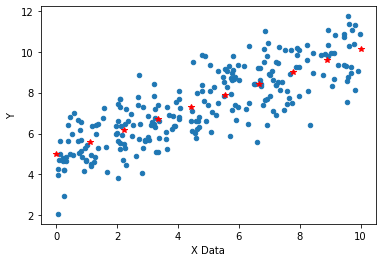

In [71]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')